In [ ]:
import numpy as np
import matplotlib
import shutil
import glob
import os
import math
!pip install sciPY
import scipy
!pip install matplotlib
import numpy as np
import matplotlib
import shutil
import glob
import os
import math
!pip install Pillow
!pip install tensorflow
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout, Flatten, Dense, BatchNormalization, GlobalAvgPool2D
#from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
#from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Sequential  # Assuming TensorFlow 2.0+
import keras
!pip install keras
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
!pip install keras-preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l1, l2
import PIL.Image
from tensorflow.keras.preprocessing.image import load_img

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.2 MB/s eta 0:00:00


In [ ]:
! pip install --upgrade pip
!pip install --upgrade Pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 34.6 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 31.2 MB/s  0:00:00
  Attempting uninstall: Pillow
    Found existing installation: pillow 11.3.0
    Uninstalling pillow-11.3.0:
      Successfully uninstalled pillow-11.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gradio 5.50.0 requires pillow<12.0,>=8.0, but you have pillow 12.1.0 which is incompatible.


In [ ]:
import zipfile
import os

# Specify the path to your zip file
zip_file_path = '/content/42.zip'

# Specify the directory where you want to extract the files
extract_to_dir = '/content/84unzip'

# Create the extraction directory if it doesn't exist
os.makedirs(extract_to_dir, exist_ok=True)

# Open the zip file and extract its contents
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_dir)

# Print a message indicating the extraction directory
print(f"Files extracted to {extract_to_dir}")

Files extracted to /content/84unzip


In [ ]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

benign_input = '/content/84unzip/1111/Bengin cases'
benign_output = '/content/88unzip/777/Bengin cases'
os.makedirs(benign_output, exist_ok=True)

target_benign = 700
current_benign = len([f for f in os.listdir(benign_input) if f.lower().endswith(('.png','.jpg','.jpeg'))])
benign_needed = target_benign - current_benign

print("Benign current:", current_benign)
print("Benign to generate:", benign_needed)

datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

generated = 0
image_files = [f for f in os.listdir(benign_input) if f.lower().endswith(('.png','.jpg','.jpeg'))]

while generated < benign_needed:
    for img_file in image_files:
        img = load_img(os.path.join(benign_input, img_file))
        x = img_to_array(img)
        x = x.reshape((1,) + x.shape)

        for batch in datagen.flow(x, batch_size=1, save_to_dir=benign_output,
                                  save_prefix='benign_aug', save_format='jpeg'):
            generated += 1
            if generated >= benign_needed:
                break
    if generated >= benign_needed:
        break

print("✅ Benign augmentation done")

Benign current: 120
Benign to generate: 580
✅ Benign augmentation done


In [ ]:
mal_input = '/content/84unzip/1111/Malignant cases'
mal_output = '/content/88unzip/777/Malignant cases'
os.makedirs(mal_output, exist_ok=True)

target_mal = 700
current_mal = len([f for f in os.listdir(mal_input) if f.lower().endswith(('.png','.jpg','.jpeg'))])
mal_needed = target_mal - current_mal

print("Malignant current:", current_mal)
print("Malignant to generate:", mal_needed)

generated = 0
image_files = [f for f in os.listdir(mal_input) if f.lower().endswith(('.png','.jpg','.jpeg'))]

while generated < mal_needed:
    for img_file in image_files:
        img = load_img(os.path.join(mal_input, img_file))
        x = img_to_array(img)
        x = x.reshape((1,) + x.shape)

        for batch in datagen.flow(x, batch_size=1, save_to_dir=mal_output,
                                  save_prefix='mal_aug', save_format='jpeg'):
            generated += 1
            if generated >= mal_needed:
                break
    if generated >= mal_needed:
        break

print("✅ Malignant augmentation done")

Malignant current: 561
Malignant to generate: 139
✅ Malignant augmentation done


In [ ]:
import os
from PIL import Image

def resize_images(input_folder, output_folder, target_size=(300, 300)):
    """
    Resizes all images in the input_folder to the target_size and saves them in the output_folder.

    Args:
        input_folder (str): Path to the folder containing the original images.
        output_folder (str): Path to the folder to save resized images.
        target_size (tuple): Desired size for resized images (width, height).
    """
    # Create output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    # Iterate through all files in the input folder
    for filename in os.listdir(input_folder):
        input_path = os.path.join(input_folder, filename)

        try:
            # Open the image
            with Image.open(input_path) as img:
                # Resize the image
                img_resized = img.resize(target_size, Image.ANTIALIAS)

                # Save the resized image in the output folder
                output_path = os.path.join(output_folder, filename)
                img_resized.save(output_path)
                print(f"Resized and saved: {filename}")
        except Exception as e:
            print(f"Error processing {filename}: {e}")

# Example usage
input_folder = "/content/88unzip/777"
output_folder = "/content/outputresizenew"
resize_images(input_folder, output_folder)

Error processing Malignant cases: [Errno 21] Is a directory: '/content/88unzip/777/Malignant cases'
Error processing Bengin cases: [Errno 21] Is a directory: '/content/88unzip/777/Bengin cases'


In [ ]:
#count number of images and classes Benign=0 maligant=1
ROOT_DIR="/content/88unzip/777"
number_of_images={}
for dir in os.listdir(ROOT_DIR):
       number_of_images[dir]=len(os.listdir(os.path.join(ROOT_DIR,dir)))
       number_of_images.items()

In [ ]:
number_of_images.items()

dict_items([('Malignant cases', 681), ('Bengin cases', 676)])

In [ ]:
import os
import shutil
import random
import math

ROOT_DIR = '/content/88unzip/777'  # replace with your dataset root
random.seed(42)  # for reproducibility

# Count the number of images in each class
number_of_images = {}
for dir_name in os.listdir(ROOT_DIR):
    dir_path = os.path.join(ROOT_DIR, dir_name)
    if os.path.isdir(dir_path):
        number_of_images[dir_name] = len(os.listdir(dir_path))

# Create train, validation, and test folders if not exist
for split in ['train111x', 'validation111x', 'test111x']:
    if not os.path.exists(split):
        os.mkdir(split)
        for class_name in os.listdir(ROOT_DIR):
            class_path = os.path.join(ROOT_DIR, class_name)
            if os.path.isdir(class_path):
                os.makedirs(os.path.join(split, class_name), exist_ok=True)

# Split the dataset
for class_name in os.listdir(ROOT_DIR):
    class_path = os.path.join(ROOT_DIR, class_name)
    if not os.path.isdir(class_path):
        continue

    all_images = os.listdir(class_path)
    random.shuffle(all_images)  # shuffle once

    total_images = len(all_images)
    train_size = int(0.8 * total_images)
    val_size = int(0.1 * total_images)
    test_size = total_images - train_size - val_size  # remainder to test

    train_images = all_images[:train_size]
    val_images = all_images[train_size:train_size + val_size]
    test_images = all_images[train_size + val_size:]

    # Move or copy files
    for img in train_images:
        shutil.copy(os.path.join(class_path, img), os.path.join('train111x', class_name, img))

    for img in val_images:
        shutil.copy(os.path.join(class_path, img), os.path.join('validation111x', class_name, img))

    for img in test_images:
        shutil.copy(os.path.join(class_path, img), os.path.join('test111x', class_name, img))

print("Dataset splitting completed successfully.")

Dataset splitting completed successfully.


In [ ]:
# Count the number of images in each class
for dir in os.listdir(ROOT_DIR):
    number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))

# Split the dataset: 70% training, 15% testing, and 15% validation
if not os.path.exists("./train111x"):
    os.mkdir("./train111x")
    os.mkdir("./test111x")
    os.mkdir("./validation111x")

    for dir in os.listdir(ROOT_DIR):
        os.makedirs("./train111x/" + dir)
        os.makedirs("./test111x/" + dir)
        os.makedirs("./validation111x/" + dir)
        # Calculate the number of images for each split
        train_size = math.floor(0.7 * number_of_images[dir])
        test_size = math.floor(0.15 * number_of_images[dir])
        validation_size = number_of_images[dir] - train_size - test_size

        # Get a random sample of images for each split
        all_images = os.listdir(os.path.join(ROOT_DIR, dir))
        train_images = np.random.choice(all_images, size=train_size, replace=False)
        remaining_images = list(set(all_images) - set(train_images))
        test_images = np.random.choice(remaining_images, size=test_size, replace=False)
        validation_images = list(set(remaining_images) - set(test_images))

        # Move images to the appropriate folders
        for img in train_images:
            source_path = os.path.join(ROOT_DIR, dir, img)
            destination_path = os.path.join("./train111x", dir, img)
            shutil.copy(source_path, destination_path)
            os.remove(source_path)

        for img in test_images:
            source_path = os.path.join(ROOT_DIR, dir, img)
            destination_path = os.path.join("./test111x", dir, img)
            shutil.copy(source_path, destination_path)
            os.remove(source_path)

        for img in validation_images:
            source_path = os.path.join(ROOT_DIR, dir, img)
            destination_path = os.path.join("./validation111x", dir, img)
            shutil.copy(source_path, destination_path)
            os.remove(source_path)
else:
    print("The folders already exist.")

The folders already exist.


In [ ]:
# Count the number of images in the validation folder
number_of_images_val = {}
for dir in os.listdir("./validation111x"):
    number_of_images_val[dir] = len(os.listdir(os.path.join("./validation111x", dir)))

number_of_images_val

{'Malignant cases': 68, 'Bengin cases': 67}

In [ ]:
# Count the number of images in the training folder
number_of_images_train = {}
for dir in os.listdir("./train111x"):
    number_of_images_train[dir] = len(os.listdir(os.path.join("./train111x", dir)))

number_of_images_train

{'Malignant cases': 544, 'Bengin cases': 540}

In [ ]:
# Count the number of images in the test folder
number_of_images_test = {}
for dir in os.listdir("./test111x"):
    number_of_images_test[dir] = len(os.listdir(os.path.join("./test111x", dir)))

number_of_images_test

{'Malignant cases': 69, 'Bengin cases': 69}

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, roc_curve
)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Flatten,Dense
from keras.models import Model,load_model
from keras.applications.mobilenet import MobileNet
# Import necessary libraries from TensorFlow's Keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization, GlobalAvgPool2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.regularizers import l1, l2
import PIL.Image

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Swish activation
def swish(x):
    return x * tf.nn.sigmoid(x)

# Squeeze-and-Excitation block
def se_block(inputs, se_ratio=0.25):
    input_channels = inputs.shape[-1]
    reduced_channels = max(1, int(input_channels * se_ratio))

    x = layers.GlobalAveragePooling2D()(inputs)
    x = layers.Reshape((1, 1, input_channels))(x)
    x = layers.Conv2D(reduced_channels, kernel_size=1, activation='swish')(x)
    x = layers.Conv2D(input_channels, kernel_size=1, activation='sigmoid')(x)
    return layers.Multiply()([inputs, x])

# MBConv block
def mbconv_block(inputs, expansion_factor, output_channels, kernel_size, stride, se_ratio, drop_rate):
    input_channels = inputs.shape[-1]
    expanded_channels = input_channels * expansion_factor

    # Expansion phase
    if expansion_factor != 1:
        x = layers.Conv2D(expanded_channels, kernel_size=1, padding='same', use_bias=False)(inputs)
        x = layers.BatchNormalization()(x)
        x = layers.Activation(swish)(x)
    else:
        x = inputs

    # Depthwise Convolution
    x = layers.DepthwiseConv2D(kernel_size, strides=stride, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation(swish)(x)

    # Squeeze-and-Excitation
    x = se_block(x, se_ratio)

    # Projection phase
    x = layers.Conv2D(output_channels, kernel_size=1, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)

    # Residual connection
    if stride == 1 and input_channels == output_channels:
        if drop_rate > 0:
            x = layers.Dropout(drop_rate)(x)
        x = layers.Add()([inputs, x])
    return x

In [ ]:
from tensorflow.keras.applications.efficientnet import preprocess_input

train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=25,
    zoom_range=0.2,
    width_shift_range=0.15,
    height_shift_range=0.15,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_data = train_datagen.flow_from_directory(
    '/content/train111x',
    target_size=(300, 300),
    batch_size=32,
    class_mode='binary'
)

val_data = val_datagen.flow_from_directory(
    '/content/validation111x',
    target_size=(300, 300),
    batch_size=32,
    class_mode='binary'
)


Found 1084 images belonging to 2 classes.
Found 135 images belonging to 2 classes.


In [ ]:
# ==============================
# Custom Lag Compensation Layer
# ==============================
class LagCompensationLayer(layers.Layer):
    def __init__(self, K=1.0, T1=0.1, **kwargs):
        super().__init__(**kwargs)
        self.K = K
        self.T1 = T1

    def call(self, inputs):
        return self.K * (inputs + self.T1 * tf.nn.relu(inputs))

# ==============================
# Custom Lead Compensation Layer
# ==============================
class LeadCompensationLayer(layers.Layer):
    def __init__(self, K=1.0, T2=0.05, **kwargs):
        super().__init__(**kwargs)
        self.K = K
        self.T2 = T2

    def call(self, inputs):
        return self.K * (inputs - self.T2 * tf.nn.relu(-inputs))

# ==============================
# Build EfficientNetB3 + Lag/Lead
# ==============================
def build_efficientnet_b3_with_compensation(input_shape):
    inputs = layers.Input(shape=input_shape)

    base_model = tf.keras.applications.EfficientNetB3(
        include_top=False,
        input_tensor=inputs,
        weights='imagenet'
    )

    base_model.trainable = False  # Freeze pretrained weights first

    x = base_model.output

    # Lag & Lead Compensation
    x_lag = LagCompensationLayer()(x)
    x_lead = LeadCompensationLayer()(x)

    # Concatenate original + compensated features
    x = layers.Concatenate()([x, x_lag, x_lead])

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.3)(x)
    outputs = layers.Dense(1, activation='sigmoid')(x)

    model = Model(inputs, outputs) # Changed models.Model to Model
    return model

from tensorflow.keras.optimizers import Adam

model = build_efficientnet_b3_with_compensation((300, 300, 3))

model.compile(
    optimizer=Adam(1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy']
)
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_weights = compute_class_weight(
    'balanced',
    classes=np.unique(train_data.classes),
    y=train_data.classes
)
class_weights = dict(enumerate(class_weights))
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

callbacks = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=2, verbose=1),
    EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True),
    ModelCheckpoint("best_model.keras", monitor='val_accuracy', save_best_only=True, verbose=1)
]
history1 = model.fit(
    train_data,
    validation_data=val_data,
    epochs=12,
    class_weight=class_weights,
    callbacks=callbacks
)

43941136/43941136 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/12
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6121 - loss: 0.6640
Epoch 1: val_accuracy improved from -inf to 0.92593, saving model to best_model.keras
34/34 ━━━━━━━━━━━━━━━━━━━━ 148s 3s/step - accuracy: 0.6149 - loss: 0.6618 - val_accuracy: 0.9259 - val_loss: 0.4506 - learning_rate: 1.0000e-04
Epoch 2/12
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 960ms/step - accuracy: 0.8732 - loss: 0.4234
Epoch 2: val_accuracy improved from 0.92593 to 0.97037, saving model to best_model.keras
34/34 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.8740 - loss: 0.4224 - val_accuracy: 0.9704 - val_loss: 0.3067 - learning_rate: 1.0000e-04
Epoch 3/12
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 868ms/step - accuracy: 0.9321 - loss: 0.3141
Epoch 3: val_accuracy improved from 0.97037 to 0.98519, saving model to best_model.keras
34/34 ━━━━━━━━━━━━━━━━━━━━ 32s 923ms/step - accuracy: 0.9324 - loss: 0.3133 - val_accuracy: 0.9852 - val_loss: 0.2308 - learning_rate: 1.0000e-04
Epoch 4/12
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 867ms/s

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5153 - loss: 0.7040
Epoch 1: val_accuracy did not improve from 0.99259
34/34 ━━━━━━━━━━━━━━━━━━━━ 127s 2s/step - accuracy: 0.5186 - loss: 0.7025 - val_accuracy: 0.6148 - val_loss: 0.6291 - learning_rate: 1.0000e-05
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 835ms/step - accuracy: 0.8627 - loss: 0.4876
Epoch 2: val_accuracy did not improve from 0.99259
34/34 ━━━━━━━━━━━━━━━━━━━━ 29s 861ms/step - accuracy: 0.8630 - loss: 0.4867 - val_accuracy: 0.8370 - val_loss: 0.4272 - learning_rate: 1.0000e-05
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 872ms/step - accuracy: 0.9331 - loss: 0.3420
Epoch 3: val_accuracy did not improve from 0.99259
34/34 ━━━━━━━━━━━━━━━━━━━━ 31s 900ms/step - accuracy: 0.9331 - loss: 0.3414 - val_accuracy: 0.9111 - val_loss: 0.2834 - learning_rate: 1.0000e-05
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 842ms/step - accuracy: 0.9327 - loss: 0.2744
Epoch 4: val_accuracy did not improve from 0.99259
34/34 ━━━━━━━━━

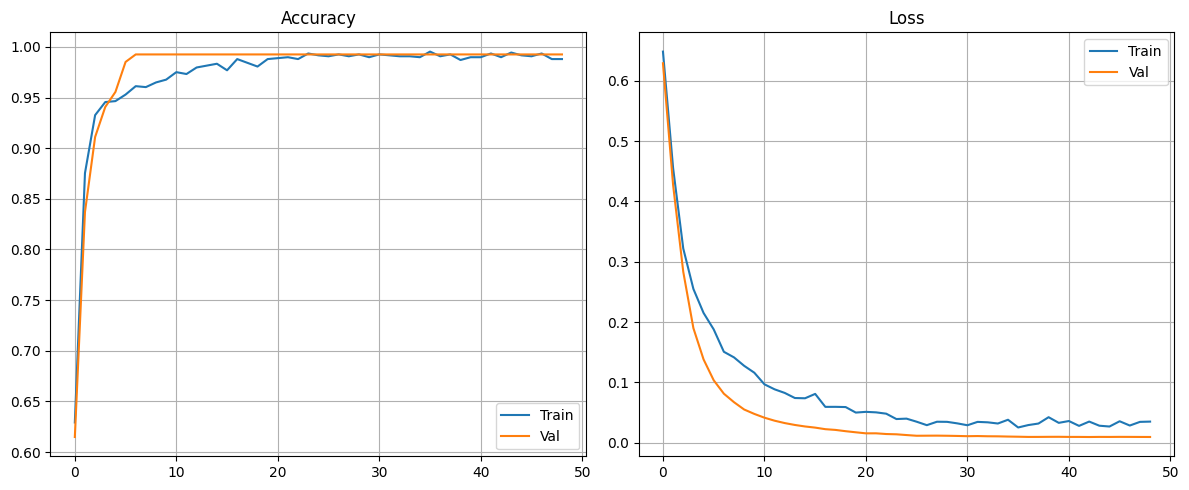

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import matplotlib.pyplot as plt
import keras # Import keras explicitly

# Custom Lag Compensation Layer (copied and registered for serialization)
@keras.saving.register_keras_serializable() # Changed tf.keras.saving to keras.saving
class LagCompensationLayer(layers.Layer):
    def __init__(self, K=1.0, T1=0.1, **kwargs):
        super().__init__(**kwargs)
        self.K = K
        self.T1 = T1

    def call(self, inputs):
        return self.K * (inputs + self.T1 * tf.nn.relu(inputs))

    def get_config(self):
        config = super().get_config()
        config.update({
            "K": self.K,
            "T1": self.T1,
        })
        return config

# Custom Lead Compensation Layer (copied and registered for serialization)
@keras.saving.register_keras_serializable() # Changed tf.keras.saving to keras.saving
class LeadCompensationLayer(layers.Layer):
    def __init__(self, K=1.0, T2=0.05, **kwargs):
        super().__init__(**kwargs)
        self.K = K
        self.T2 = T2

    def call(self, inputs):
        return self.K * (inputs - self.T2 * tf.nn.relu(-inputs))

    def get_config(self):
        config = super().get_config()
        config.update({
            "K": self.K,
            "T2": self.T2,
        })
        return config

# Build EfficientNetB3 + Lag/Lead (copied and modified to return base_model)
def build_efficientnet_b3_with_compensation(input_shape):
    inputs = layers.Input(shape=input_shape)

    base_model = tf.keras.applications.EfficientNetB3(
        include_top=False,
        input_tensor=inputs,
        weights='imagenet'
    )

    # base_model.trainable will be set below after instantiation

    x = base_model.output

    x_lag = LagCompensationLayer()(x)
    x_lead = LeadCompensationLayer()(x)

    x = layers.Concatenate()([x, x_lag, x_lead])

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.3)(x)
    outputs = layers.Dense(1, activation='sigmoid')(x)

    model = models.Model(inputs, outputs)
    return model, base_model # Return both model and base_model

# Re-instantiate the model and base_model within this cell's scope
input_shape = (300, 300, 3) # Assuming this was the correct input shape
model, base_model = build_efficientnet_b3_with_compensation(input_shape)

# Assuming train_data, val_data, class_weights, and callbacks are available from previous executed cells.
# train_data and val_data were from cell -huygx_hhrgv
# class_weights and callbacks were from cell VyK62j9ah7MZ

base_model.trainable = True

# Freeze lower layers, train top 40 layers
for layer in base_model.layers[:-40]:
    layer.trainable = False

model.compile(
    optimizer=Adam(1e-5),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history2 = model.fit(
    train_data,
    validation_data=val_data,
    epochs=100,
    class_weight=class_weights,
    callbacks=callbacks
)
model.save("final_lag_lead_efficientnetB3_model.keras")
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history2.history["accuracy"], label="Train")
plt.plot(history2.history["val_accuracy"], label="Val")
plt.title("Accuracy")
plt.legend()
plt.grid()

plt.subplot(1,2,2)
plt.plot(history2.history["loss"], label="Train")
plt.plot(history2.history["val_loss"], label="Val")
plt.title("Loss")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

Found 138 images belonging to 2 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step
Best Threshold: 0.562119
Best Recall: 0.9565217391304348
Best Precision: 0.9850746268656716

Confusion Matrix:
[[61  8]
 [ 0 69]]


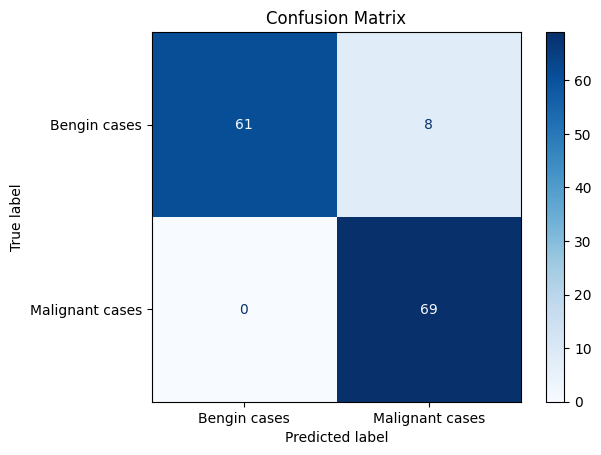


Test Accuracy: 0.9420
Precision: 0.8961
Recall: 1.0000
F1-Score: 0.9452
AUC: 0.9964


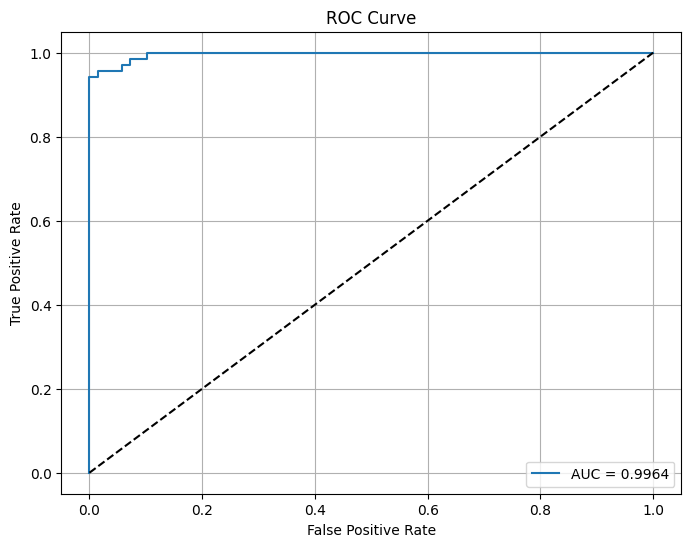

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    ConfusionMatrixDisplay
)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.efficientnet import preprocess_input
import tensorflow as tf
from tensorflow.keras import layers
import keras # Ensure keras is imported if you're using keras.saving

# ==============================
# Custom Lag Compensation Layer (Redefined for serialization)
# ==============================
@keras.saving.register_keras_serializable()
class LagCompensationLayer(layers.Layer):
    def __init__(self, K=1.0, T1=0.1, **kwargs):
        super().__init__(**kwargs)
        self.K = K
        self.T1 = T1

    def call(self, inputs):
        return self.K * (inputs + self.T1 * tf.nn.relu(inputs))

    def get_config(self):
        config = super().get_config()
        config.update({
            "K": self.K,
            "T1": self.T1,
        })
        return config

# ==============================
# Custom Lead Compensation Layer (Redefined for serialization)
# ==============================
@keras.saving.register_keras_serializable()
class LeadCompensationLayer(layers.Layer):
    def __init__(self, K=1.0, T2=0.05, **kwargs):
        super().__init__(**kwargs)
        self.K = K
        self.T2 = T2

    def call(self, inputs):
        return self.K * (inputs - self.T2 * tf.nn.relu(-inputs))

    def get_config(self):
        config = super().get_config()
        config.update({
            "K": self.K,
            "T2": self.T2,
        })
        return config

# ==============================
# Load Model
# ==============================
# The first load_model call is correct, the second was redundant.
best_model = load_model(
    '/content/best_model.keras',
    custom_objects={
        'LagCompensationLayer': LagCompensationLayer,
        'LeadCompensationLayer': LeadCompensationLayer
    }
)

# ==============================
# Test Data Generator (MATCH TRAINING PREPROCESSING)
# ==============================
test_data_dir = 'test111x'
batch_size = 32

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(300, 300),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

# ==============================
# Predictions
# =============
predictions = best_model.predict(test_generator)
predicted_classes = (predictions > 0.31).astype(int)

true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())
from sklearn.metrics import precision_recall_curve
import numpy as np

precision, recall, thresholds = precision_recall_curve(true_classes, predictions)

f1_scores = 2 * precision * recall / (precision + recall + 1e-8)
best_idx = np.argmax(f1_scores)
best_thresh = thresholds[best_idx]

print("Best Threshold:", best_thresh)
print("Best Recall:", recall[best_idx])
print("Best Precision:", precision[best_idx])


# ==============================
# Confusion Matrix
# ==============================
cm = confusion_matrix(true_classes, predicted_classes)
print("\nConfusion Matrix:")
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# ==============================
# Metrics
# ==============================
test_accuracy = accuracy_score(true_classes, predicted_classes)
precision = precision_score(true_classes, predicted_classes)
recall = recall_score(true_classes, predicted_classes)
f1 = f1_score(true_classes, predicted_classes)
auc_score = roc_auc_score(true_classes, predictions)

print(f"\nTest Accuracy: {test_accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"AUC: {auc_score:.4f}")

# ==============================
# ROC Curve
# ==============================
fpr, tpr, _ = roc_curve(true_classes, predictions)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.4f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Found 138 images belonging to 2 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/5 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step

5/5 ━━━━━━━━━━━━━━━━━━━━ 23s 3s/step
Best Threshold: 0.562119
Best Recall: 0.9565217391304348
Best Precision: 0.9850746268656716

Confusion Matrix:
[[62  7]
 [ 1 68]]


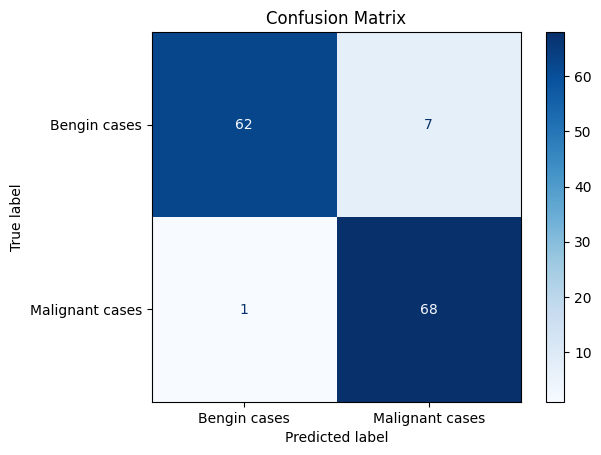


Test Accuracy: 0.9420
Precision: 0.9067
Recall: 0.9855
F1-Score: 0.9444
AUC: 0.9964


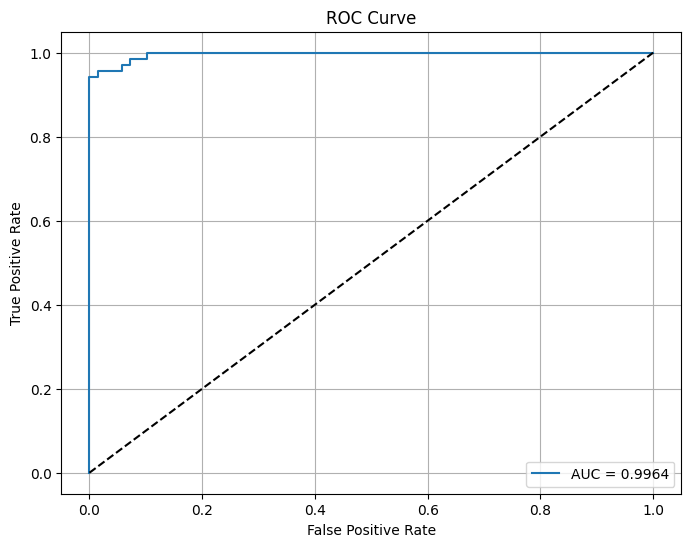

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    ConfusionMatrixDisplay
)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.efficientnet import preprocess_input
import tensorflow as tf
from tensorflow.keras import layers
import keras # Ensure keras is imported if you're using keras.saving

# ==============================
# Custom Lag Compensation Layer (Redefined for serialization)
# ==============================
@keras.saving.register_keras_serializable()
class LagCompensationLayer(layers.Layer):
    def __init__(self, K=1.0, T1=0.1, **kwargs):
        super().__init__(**kwargs)
        self.K = K
        self.T1 = T1

    def call(self, inputs):
        return self.K * (inputs + self.T1 * tf.nn.relu(inputs))

    def get_config(self):
        config = super().get_config()
        config.update({
            "K": self.K,
            "T1": self.T1,
        })
        return config

# ==============================
# Custom Lead Compensation Layer (Redefined for serialization)
# ==============================
@keras.saving.register_keras_serializable()
class LeadCompensationLayer(layers.Layer):
    def __init__(self, K=1.0, T2=0.05, **kwargs):
        super().__init__(**kwargs)
        self.K = K
        self.T2 = T2

    def call(self, inputs):
        return self.K * (inputs - self.T2 * tf.nn.relu(-inputs))

    def get_config(self):
        config = super().get_config()
        config.update({
            "K": self.K,
            "T2": self.T2,
        })
        return config

# ==============================
# Load Model
# ==============================
# The first load_model call is correct, the second was redundant.
best_model = load_model(
    '/content/best_model.keras',
    custom_objects={
        'LagCompensationLayer': LagCompensationLayer,
        'LeadCompensationLayer': LeadCompensationLayer
    }
)

# ==============================
# Test Data Generator (MATCH TRAINING PREPROCESSING)
# ==============================
test_data_dir = 'test111x'
batch_size = 32

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(300, 300),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

# ==============================
# Predictions
# =============
predictions = best_model.predict(test_generator)
predicted_classes = (predictions > 0.41).astype(int)

true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())
from sklearn.metrics import precision_recall_curve
import numpy as np

precision, recall, thresholds = precision_recall_curve(true_classes, predictions)

f1_scores = 2 * precision * recall / (precision + recall + 1e-8)
best_idx = np.argmax(f1_scores)
best_thresh = thresholds[best_idx]

print("Best Threshold:", best_thresh)
print("Best Recall:", recall[best_idx])
print("Best Precision:", precision[best_idx])


# ==============================
# Confusion Matrix
# ==============================
cm = confusion_matrix(true_classes, predicted_classes)
print("\nConfusion Matrix:")
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# ==============================
# Metrics
# ==============================
test_accuracy = accuracy_score(true_classes, predicted_classes)
precision = precision_score(true_classes, predicted_classes)
recall = recall_score(true_classes, predicted_classes)
f1 = f1_score(true_classes, predicted_classes)
auc_score = roc_auc_score(true_classes, predictions)

print(f"\nTest Accuracy: {test_accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"AUC: {auc_score:.4f}")

# ==============================
# ROC Curve
# ==============================
fpr, tpr, _ = roc_curve(true_classes, predictions)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.4f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Found 138 images belonging to 2 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step
Best Threshold: 0.562119
Best Recall: 0.9565217391304348
Best Precision: 0.9850746268656716

Confusion Matrix:
[[65  4]
 [ 2 67]]


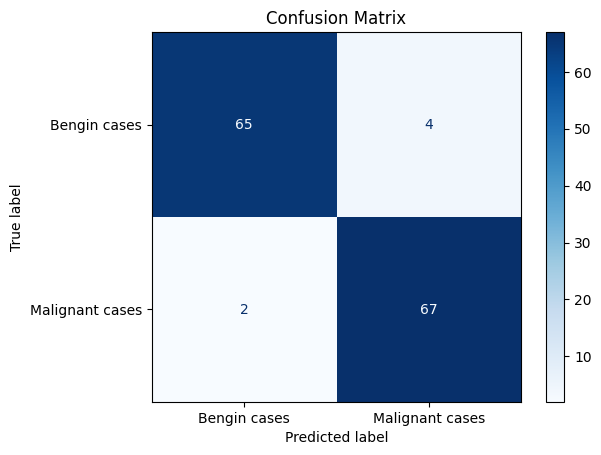


Test Accuracy: 0.9565
Precision: 0.9437
Recall: 0.9710
F1-Score: 0.9571
AUC: 0.9964


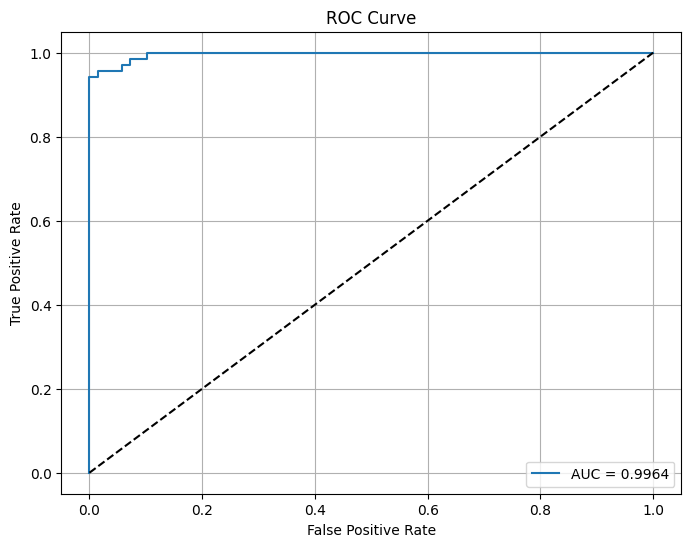

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    ConfusionMatrixDisplay
)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.efficientnet import preprocess_input
import tensorflow as tf
from tensorflow.keras import layers
import keras # Ensure keras is imported if you're using keras.saving

# ==============================
# Custom Lag Compensation Layer (Redefined for serialization)
# ==============================
@keras.saving.register_keras_serializable()
class LagCompensationLayer(layers.Layer):
    def __init__(self, K=1.0, T1=0.1, **kwargs):
        super().__init__(**kwargs)
        self.K = K
        self.T1 = T1

    def call(self, inputs):
        return self.K * (inputs + self.T1 * tf.nn.relu(inputs))

    def get_config(self):
        config = super().get_config()
        config.update({
            "K": self.K,
            "T1": self.T1,
        })
        return config

# ==============================
# Custom Lead Compensation Layer (Redefined for serialization)
# ==============================
@keras.saving.register_keras_serializable()
class LeadCompensationLayer(layers.Layer):
    def __init__(self, K=1.0, T2=0.05, **kwargs):
        super().__init__(**kwargs)
        self.K = K
        self.T2 = T2

    def call(self, inputs):
        return self.K * (inputs - self.T2 * tf.nn.relu(-inputs))

    def get_config(self):
        config = super().get_config()
        config.update({
            "K": self.K,
            "T2": self.T2,
        })
        return config

# ==============================
# Load Model
# ==============================
# The first load_model call is correct, the second was redundant.
best_model = load_model(
    '/content/best_model.keras',
    custom_objects={
        'LagCompensationLayer': LagCompensationLayer,
        'LeadCompensationLayer': LeadCompensationLayer
    }
)

# ==============================
# Test Data Generator (MATCH TRAINING PREPROCESSING)
# ==============================
test_data_dir = 'test111x'
batch_size = 32

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(300, 300),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

# ==============================
# Predictions
# =============
predictions = best_model.predict(test_generator)
predicted_classes = (predictions > 0.46).astype(int)

true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())
from sklearn.metrics import precision_recall_curve
import numpy as np

precision, recall, thresholds = precision_recall_curve(true_classes, predictions)

f1_scores = 2 * precision * recall / (precision + recall + 1e-8)
best_idx = np.argmax(f1_scores)
best_thresh = thresholds[best_idx]

print("Best Threshold:", best_thresh)
print("Best Recall:", recall[best_idx])
print("Best Precision:", precision[best_idx])


# ==============================
# Confusion Matrix
# ==============================
cm = confusion_matrix(true_classes, predicted_classes)
print("\nConfusion Matrix:")
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# ==============================
# Metrics
# ==============================
test_accuracy = accuracy_score(true_classes, predicted_classes)
precision = precision_score(true_classes, predicted_classes)
recall = recall_score(true_classes, predicted_classes)
f1 = f1_score(true_classes, predicted_classes)
auc_score = roc_auc_score(true_classes, predictions)

print(f"\nTest Accuracy: {test_accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"AUC: {auc_score:.4f}")

# ==============================
# ROC Curve
# ==============================
fpr, tpr, _ = roc_curve(true_classes, predictions)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.4f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

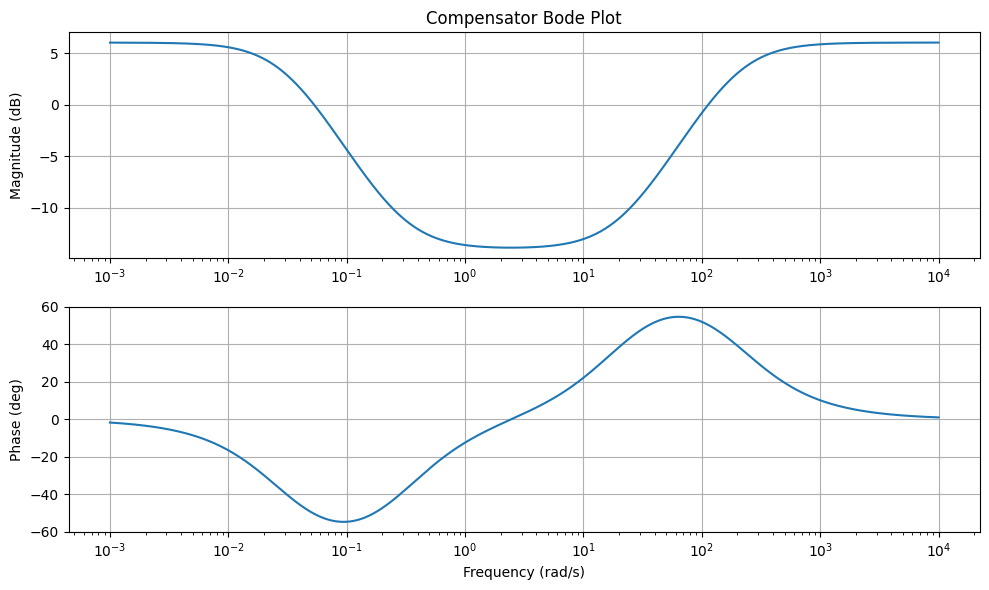

43941136/43941136 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step

Model ready with Lag-Lead LR compensation!
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 19s 0us/step


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import Callback
from tensorflow.keras import layers, Model

# =============================================================================
# PART 1: Lag-Lead Compensator Design (Control Theory)
# =============================================================================

class LagLeadCompensator:
    """
    Lag-Lead Compensator for Learning Rate Optimization
    Gc(s) = K (s + z_lag)(s + z_lead) / (s + p_lag)(s + p_lead)
    """

    def __init__(self, K=1.5, z_lag=0.5, p_lag=0.05, z_lead=15.0, p_lead=150.0):
        self.K = K
        self.z_lag = z_lag
        self.p_lag = p_lag
        self.z_lead = z_lead
        self.p_lead = p_lead

        self.num = [K, K*(z_lag + z_lead), K*z_lag*z_lead]
        self.den = [1, (p_lag + p_lead), p_lag*p_lead]

        self.system = signal.TransferFunction(self.num, self.den)

    def bode_plot(self, omega=None):
        if omega is None:
            omega = np.logspace(-3, 4, 1000)
        return signal.bode(self.system, omega)

    def frequency_response(self, freq):
        w, mag, phase = signal.bode(self.system, [freq])
        return mag[0], phase[0]

    def discrete_approximation(self, dt=1.0):
        return signal.cont2discrete((self.num, self.den), dt, method='bilinear')


# =============================================================================
# PART 2: Compensated Learning Rate Scheduler
# =============================================================================

class CompensatedLearningRateScheduler(Callback):
    def __init__(self, base_lr=0.001, compensator=None, warmup_epochs=5, total_epochs=50):
        super().__init__()
        self.base_lr = base_lr
        self.compensator = compensator or LagLeadCompensator()
        self.warmup_epochs = warmup_epochs
        self.total_epochs = total_epochs
        self.lr_history = []
        self.epoch_history = []

    def on_epoch_begin(self, epoch, logs=None):
        normalized_freq = epoch / self.total_epochs
        omega = 0.01 + normalized_freq * 100

        mag_db, _ = self.compensator.frequency_response(omega)
        mag_linear = 10 ** (mag_db / 20)

        if epoch < self.warmup_epochs:
            warmup_factor = (epoch + 1) / self.warmup_epochs
            compensated_lr = self.base_lr * warmup_factor
        else:
            progress = (epoch - self.warmup_epochs) / (self.total_epochs - self.warmup_epochs)
            cosine_decay = 0.5 * (1 + np.cos(np.pi * progress))
            compensated_lr = self.base_lr * cosine_decay * mag_linear

        compensated_lr = max(compensated_lr, self.base_lr * 1e-4)

        # ✅ Correct TF2 learning rate update
        tf.keras.backend.set_value(self.model.optimizer.learning_rate, compensated_lr)

        self.lr_history.append(compensated_lr)
        self.epoch_history.append(epoch)

        print(f"Epoch {epoch+1}: LR = {compensated_lr:.6f}, Gain = {mag_linear:.3f}")

    def plot_compensation_effect(self):
        plt.figure(figsize=(10,5))
        plt.plot(self.epoch_history, self.lr_history, label="Compensated LR")
        plt.xlabel("Epoch")
        plt.ylabel("Learning Rate")
        plt.title("Lag-Lead Compensated Learning Rate Schedule")
        plt.grid(True)
        plt.legend()
        plt.show()


# =============================================================================
# PART 3: EfficientNet-B3 Model
# =============================================================================

def create_efficientnet_b3_model(num_classes=10, input_shape=(300, 300, 3)):
    base_model = EfficientNetB3(weights='imagenet', include_top=False, input_shape=input_shape)
    base_model.trainable = False

    inputs = tf.keras.Input(shape=input_shape)
    x = base_model(inputs, training=False)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.3)(x)
    x = layers.Dense(512, activation='swish')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.2)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = Model(inputs, outputs)
    return model, base_model


# =============================================================================
# PART 4: Training Pipeline
# =============================================================================

def train_with_compensation():
    compensator = LagLeadCompensator(K=2.0, z_lag=0.3, p_lag=0.03, z_lead=20.0, p_lead=200.0)

    # Show Bode plot (no image needed)
    w, mag, phase = compensator.bode_plot()
    plt.figure(figsize=(10,6))
    plt.subplot(2,1,1)
    plt.semilogx(w, mag)
    plt.title("Compensator Bode Plot")
    plt.ylabel("Magnitude (dB)")
    plt.grid(True)

    plt.subplot(2,1,2)
    plt.semilogx(w, phase)
    plt.ylabel("Phase (deg)")
    plt.xlabel("Frequency (rad/s)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    model, base_model = create_efficientnet_b3_model()

    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    lr_scheduler = CompensatedLearningRateScheduler(base_lr=0.001, compensator=compensator)

    print("\nModel ready with Lag-Lead LR compensation!")
    return model, base_model, lr_scheduler


# =============================================================================
# PART 5: RUN TRAINING
# =============================================================================

if __name__ == "__main__":
    model, base_model, scheduler = train_with_compensation()

    # Load CIFAR-10
    (x_train, y_train), (x_val, y_val) = tf.keras.datasets.cifar10.load_data()
    y_train = tf.keras.utils.to_categorical(y_train, 10)
    y_val = tf.keras.utils.to_categorical(y_val, 10)

    # Resize images for EfficientNet
    x_train = tf.image.resize(x_train, [300, 300]) / 255.0
    x_val = tf.image.resize(x_val, [300, 300]) / 255.0

    # Phase 1: Train classifier head
    model.fit(x_train, y_train,
              validation_data=(x_val, y_val),
              epochs=10,
              batch_size=32,
              callbacks=[scheduler])

    # Phase 2: Fine-tune full model
    base_model.trainable = True
    model.compile(optimizer=Adam(1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

    model.fit(x_train, y_train,
              validation_data=(x_val, y_val),
              epochs=10,
              batch_size=32,
              callbacks=[scheduler])

    scheduler.plot_compensation_effect()